# Total VS Week

They (who?) say that a turn in [a curve like these](https://aatishb.com/covidtrends/) signals a stopping pandemy: The more people get infected, the more people should get infected per week. However, if that trend ceases to continue, the vicious circle has been stopped.

## Germany

(10.0, 688.8)

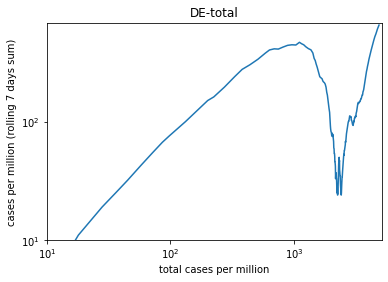

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scrape import entorb

area = 'DE-total'
de = entorb.to_dataframe(area)
de['Cases_New_Weekly_Per_Million'] = de['Cases_New_Per_Million'].rolling('7D').sum()
ax = de.plot(kind='line',
             x='Cases_Per_Million',
             y='Cases_New_Weekly_Per_Million',
             marker='',
             title=area,
             legend=False)
ax.set_xlabel('total cases per million')
ax.set_xscale('symlog')
ax.set_xlim(left=10)
ax.set_ylabel('cases per million (rolling 7 days sum)')
ax.set_yscale('symlog')
ax.set_ylim(bottom=10)

## German federal states

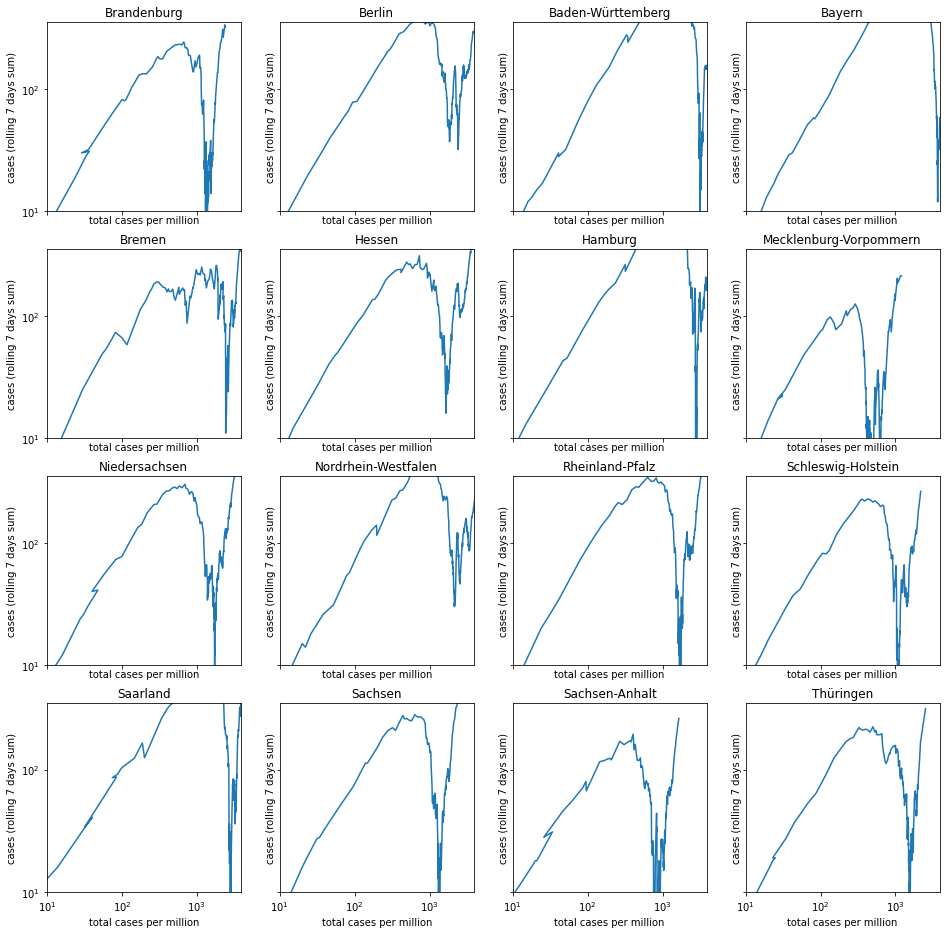

In [2]:
fst = {
    "BB": "Brandenburg",
    "BE": "Berlin",
    "BW": "Baden-Württemberg",
    "BY": "Bayern",
    "HB": "Bremen",
    "HE": "Hessen",
    "HH": "Hamburg",
    "MV": "Mecklenburg-Vorpommern",
    "NI": "Niedersachsen",
    "NW": "Nordrhein-Westfalen",
    "RP": "Rheinland-Pfalz",
    "SH": "Schleswig-Holstein",
    "SL": "Saarland",
    "SN": "Sachsen",
    "ST": "Sachsen-Anhalt",
    "TH": "Thüringen",
}

fig, axes = plt.subplots(ncols=4, nrows=4, sharey=True, sharex=True)

for num, (ax, area) in enumerate(zip(axes.flat, fst)):
    df = entorb.to_dataframe(area)
    df['Cases_New_Weekly_Per_Million'] = df['Cases_New_Per_Million'].rolling('7D').sum()
    ax.plot('Cases_Per_Million',
             'Cases_New_Weekly_Per_Million',
             data=df,
             marker='',
             linestyle='-',
             label=fst[area])
    ax.set_xlabel('total cases per million')
    ax.set_xscale('symlog')
    ax.set_xlim(left=10)
    ax.set_title(fst[area])
    ax.set_ylabel('cases (rolling 7 days sum)')
    ax.set_yscale('symlog')
    ax.set_ylim(bottom=10)
    #ax.legend()
    #ax.grid()
#fig.tight_layout()
fig.set_size_inches(16,16)
fig.set_facecolor('w')
plt.show()